# Project 2: Supervised Learning
### Building a Student Intervention System

## 1. Classification vs Regression

Your goal is to identify students who might need early intervention - which type of supervised machine learning problem is this, classification or regression? Why?

- This is a classification scenario since our goal is to use features to assign students to one of two classes.  A regression would be appropriate if our goal was to generate a function of continuous output (e.g. y= mx + b)

## 2. Exploring the Data

Let's go ahead and read in the student dataset first.

_To execute a code cell, click inside it and press **Shift+Enter**._

In [1]:
# Import libraries
import numpy as np
import pandas as pd

In [2]:
# Read student data
student_data = pd.read_csv("student-data.csv")
print "Student data read successfully!"
# Note: The last column 'passed' is the target/label, all other are feature columns

Student data read successfully!


Now, can you find out the following facts about the dataset?
- Total number of students
- Number of students who passed
- Number of students who failed
- Graduation rate of the class (%)
- Number of features

_Use the code block below to compute these values. Instructions/steps are marked using **TODO**s._

### Data Exploration

In [3]:
student_data.columns

Index([u'school', u'sex', u'age', u'address', u'famsize', u'Pstatus', u'Medu',
       u'Fedu', u'Mjob', u'Fjob', u'reason', u'guardian', u'traveltime',
       u'studytime', u'failures', u'schoolsup', u'famsup', u'paid',
       u'activities', u'nursery', u'higher', u'internet', u'romantic',
       u'famrel', u'freetime', u'goout', u'Dalc', u'Walc', u'health',
       u'absences', u'passed'],
      dtype='object')

In [4]:
student_data.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,passed
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,no,no,4,3,4,1,1,3,6,no
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,yes,no,5,3,3,1,1,3,4,no
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,yes,no,4,3,2,2,3,3,10,yes
3,GP,F,15,U,GT3,T,4,2,health,services,...,yes,yes,3,2,2,1,1,5,2,yes
4,GP,F,16,U,GT3,T,3,3,other,other,...,no,no,4,3,2,1,2,5,4,yes


In [5]:
student_data.describe()

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,Walc,health,absences
count,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000
mean,16.696203,2.749367,2.521519,1.448101,2.035443,0.334177,3.944304,3.235443,3.108861,1.481013,2.291139,3.554430,5.708861
std,1.276043,1.094735,1.088201,0.697505,0.839240,0.743651,0.896659,0.998862,1.113278,0.890741,1.287897,1.390303,8.003096
min,15.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000
25%,16.000000,2.000000,2.000000,1.000000,1.000000,0.000000,4.000000,3.000000,2.000000,1.000000,1.000000,3.000000,0.000000
50%,17.000000,3.000000,2.000000,1.000000,2.000000,0.000000,4.000000,3.000000,3.000000,1.000000,2.000000,4.000000,4.000000
75%,18.000000,4.000000,3.000000,2.000000,2.000000,0.000000,5.000000,4.000000,4.000000,2.000000,3.000000,5.000000,8.000000
max,22.000000,4.000000,4.000000,4.000000,4.000000,3.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,75.000000


In [6]:
student_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 31 columns):
school        395 non-null object
sex           395 non-null object
age           395 non-null int64
address       395 non-null object
famsize       395 non-null object
Pstatus       395 non-null object
Medu          395 non-null int64
Fedu          395 non-null int64
Mjob          395 non-null object
Fjob          395 non-null object
reason        395 non-null object
guardian      395 non-null object
traveltime    395 non-null int64
studytime     395 non-null int64
failures      395 non-null int64
schoolsup     395 non-null object
famsup        395 non-null object
paid          395 non-null object
activities    395 non-null object
nursery       395 non-null object
higher        395 non-null object
internet      395 non-null object
romantic      395 non-null object
famrel        395 non-null int64
freetime      395 non-null int64
goout         395 non-null int64
Dalc          395 no

In [7]:
student_data.shape

(395, 31)

In [8]:
# TODO: Compute desired values - replace each '?' with an appropriate expression/function call
n_students = len(student_data)
n_features = len(student_data.columns)
n_passed = student_data.passed.value_counts()[0]
n_failed = student_data.passed.value_counts()[1]
grad_rate = n_passed/float(n_students) * 100
print "Total number of students: {}".format(n_students)
print "Number of students who passed: {}".format(n_passed)
print "Number of students who failed: {}".format(n_failed)
print "Number of features: {}".format(n_features)
print "Graduation rate of the class: {:.2f}%".format(grad_rate)

Total number of students: 395
Number of students who passed: 265
Number of students who failed: 130
Number of features: 31
Graduation rate of the class: 67.09%


## 3. Preparing the Data
In this section, we will prepare the data for modeling, training and testing.

### Identify feature and target columns
It is often the case that the data you obtain contains non-numeric features. This can be a problem, as most machine learning algorithms expect numeric data to perform computations with.

Let's first separate our data into feature and target columns, and see if any features are non-numeric.<br/>
**Note**: For this dataset, the last column (`'passed'`) is the target or label we are trying to predict.

In [9]:
# Extract feature (X) and target (y) columns
feature_cols = list(student_data.columns[:-1])  # all columns but last are features
target_col = student_data.columns[-1]  # last column is the target/label
print "Feature column(s):-\n{}".format(feature_cols)
print "Target column: {}".format(target_col)

X_all = student_data[feature_cols]  # feature values for all students
y_all = student_data[target_col]  # corresponding targets/labels
print "\nFeature values:-"
X_all.head()  # print the first 5 rows

Feature column(s):-
['school', 'sex', 'age', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu', 'Mjob', 'Fjob', 'reason', 'guardian', 'traveltime', 'studytime', 'failures', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery', 'higher', 'internet', 'romantic', 'famrel', 'freetime', 'goout', 'Dalc', 'Walc', 'health', 'absences']
Target column: passed

Feature values:-


,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,higher,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,yes,no,no,4,3,4,1,1,3,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,yes,yes,no,5,3,3,1,1,3,4
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,yes,yes,no,4,3,2,2,3,3,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,yes,yes,yes,3,2,2,1,1,5,2
4,GP,F,16,U,GT3,T,3,3,other,other,...,yes,no,no,4,3,2,1,2,5,4


### Preprocess feature columns

As you can see, there are several non-numeric columns that need to be converted! Many of them are simply `yes`/`no`, e.g. `internet`. These can be reasonably converted into `1`/`0` (binary) values.

Other columns, like `Mjob` and `Fjob`, have more than two values, and are known as _categorical variables_. The recommended way to handle such a column is to create as many columns as possible values (e.g. `Fjob_teacher`, `Fjob_other`, `Fjob_services`, etc.), and assign a `1` to one of them and `0` to all others.

These generated columns are sometimes called _dummy variables_, and we will use the [`pandas.get_dummies()`](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.get_dummies.html?highlight=get_dummies#pandas.get_dummies) function to perform this transformation.

In [10]:
# Preprocess feature columns
def preprocess_features(X):
    outX = pd.DataFrame(index=X.index)  # output dataframe, initially empty

    # Check each column
    for col, col_data in X.iteritems():
        # If data type is non-numeric, try to replace all yes/no values with 1/0
        if col_data.dtype == object:
            col_data = col_data.replace(['yes', 'no'], [1, 0])
        # Note: This should change the data type for yes/no columns to int

        # If still non-numeric, convert to one or more dummy variables
        if col_data.dtype == object:
            col_data = pd.get_dummies(col_data, prefix=col)  # e.g. 'school' => 'school_GP', 'school_MS'

        outX = outX.join(col_data)  # collect column(s) in output dataframe

    return outX

X_all = preprocess_features(X_all)
print "Processed feature columns ({}):-\n{}".format(len(X_all.columns), list(X_all.columns))

Processed feature columns (48):-
['school_GP', 'school_MS', 'sex_F', 'sex_M', 'age', 'address_R', 'address_U', 'famsize_GT3', 'famsize_LE3', 'Pstatus_A', 'Pstatus_T', 'Medu', 'Fedu', 'Mjob_at_home', 'Mjob_health', 'Mjob_other', 'Mjob_services', 'Mjob_teacher', 'Fjob_at_home', 'Fjob_health', 'Fjob_other', 'Fjob_services', 'Fjob_teacher', 'reason_course', 'reason_home', 'reason_other', 'reason_reputation', 'guardian_father', 'guardian_mother', 'guardian_other', 'traveltime', 'studytime', 'failures', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery', 'higher', 'internet', 'romantic', 'famrel', 'freetime', 'goout', 'Dalc', 'Walc', 'health', 'absences']


### Split data into training and test sets

So far, we have converted all _categorical_ features into numeric values. In this next step, we split the data (both features and corresponding labels) into training and test sets.

In [11]:
from sklearn.cross_validation import train_test_split

In [12]:
# First, decide how many training vs test samples you want
#num_all = student_data.shape[0]  # same as len(student_data)
#num_train = 300  # about 75% of the data
#num_test = num_all - num_train


# TODO: Then, select features (X) and corresponding labels (y) for the training and test sets
# Note: Shuffle the data or randomly select samples to avoid any bias due to ordering in the dataset

X_train, X_test, y_train, y_test = train_test_split(X_all, y_all, test_size = 0.24, random_state = 42)

#X_train = ?
#y_train = ?
#X_test = ?
#y_test = ?
print "Training set: {} samples".format(X_train.shape[0])
print "Test set: {} samples".format(X_test.shape[0])
# Note: If you need a validation set, extract it from within training data

Training set: 300 samples
Test set: 95 samples


## Feature Selection

To enhance efficiency it would be best to limit features (limit dimensionality) in our model. This strategy will consist of:

1.  Feature selection using SelectKBest with chi^2 scoring
2.  Try feature selection using RFECV (Recursive Feature Elimination with Cross Validation): Abandoned since data set is clearly dominated by a few features.
3.  Generate plots as a reality check for features selected to visualize trends and likely impact
4.  Follow up both strategies to gauge performance and run metrics with and without feature selection

### SelectKBest with Chi^2

In [13]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

In [14]:
scores, pvals = chi2(X_train, y_train)

In [15]:
feature_sig = zip(X_train.columns, pvals)

feature_sig_df = pd.DataFrame(feature_sig, columns = ['feature', 'p_value'])
feature_sig_df = feature_sig_df.sort_values(by = 'p_value')
feature_sig_df = feature_sig_df.reset_index(drop= True)

In [16]:
feature_sig_df.head(10)

,feature,p_value
0,failures,7.736543e-13
1,absences,2.433114e-06
2,paid,5.022257e-02
3,goout,5.215696e-02
4,reason_reputation,1.279606e-01
5,Mjob_health,1.419179e-01
6,guardian_other,1.534892e-01
7,Medu,1.580709e-01
8,reason_course,2.062409e-01
9,Fedu,2.578735e-01


In [17]:
k = 20
k_best = SelectKBest(chi2, k= k)
k_best.fit(X_train, y_train)
scores_kchi2 = k_best.scores_
pairs = zip(X_all.columns, scores_kchi2)

# combined scores and features into a pandas dataframe then sort 

k_best_features = pd.DataFrame(pairs,columns = ['feature','score'])
k_best_features = k_best_features.sort_values(by= 'score',ascending = False)

k_best_features = k_best_features.reset_index(drop = True)

k_best_features.head(k)

,feature,score
0,failures,51.347882
1,absences,22.218552
2,paid,3.834012
3,goout,3.770727
4,reason_reputation,2.317073
5,Mjob_health,2.157039
6,guardian_other,2.037227
7,Medu,1.992585
8,reason_course,1.597619
9,Fedu,1.280138


### Feature Selection Results
Results suggest that many features may not be useful for predicting drop out. Visualizing features with respect to status (pass or fail) will likely be informative.

#### Exploratory Feature Analysis

In [18]:
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set(style="whitegrid", color_codes=True)

C:\Users\vhim98198\Anaconda2\lib\site-packages\matplotlib\__init__.py:872: UserWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))


In [19]:
# recombine X_all and y_all

combined_X_y = X_all.join(y_all)

# create a binary measure of passed where yes = 1 and no = 0

combined_X_y['passed_binary'] = np.where(combined_X_y.passed == 'yes', 1,0)

combined_X_y.columns

Index([u'school_GP', u'school_MS', u'sex_F', u'sex_M', u'age', u'address_R',
       u'address_U', u'famsize_GT3', u'famsize_LE3', u'Pstatus_A',
       u'Pstatus_T', u'Medu', u'Fedu', u'Mjob_at_home', u'Mjob_health',
       u'Mjob_other', u'Mjob_services', u'Mjob_teacher', u'Fjob_at_home',
       u'Fjob_health', u'Fjob_other', u'Fjob_services', u'Fjob_teacher',
       u'reason_course', u'reason_home', u'reason_other', u'reason_reputation',
       u'guardian_father', u'guardian_mother', u'guardian_other',
       u'traveltime', u'studytime', u'failures', u'schoolsup', u'famsup',
       u'paid', u'activities', u'nursery', u'higher', u'internet', u'romantic',
       u'famrel', u'freetime', u'goout', u'Dalc', u'Walc', u'health',
       u'absences', u'passed', u'passed_binary'],
      dtype='object')

C:\Users\vhim98198\Anaconda2\lib\site-packages\matplotlib\__init__.py:892: UserWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))


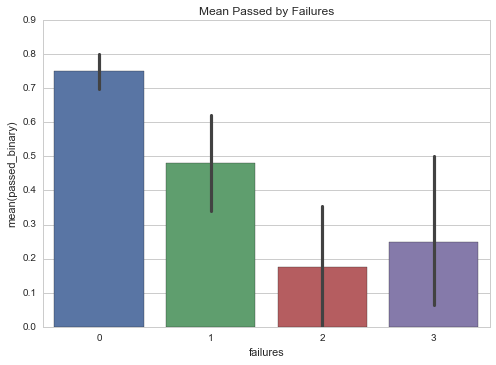

In [20]:
p= sns.barplot(x="failures", y= 'passed_binary', order= [0,1,2,3],data= combined_X_y);
p.set_title('Mean Passed by Failures')
plt.show()

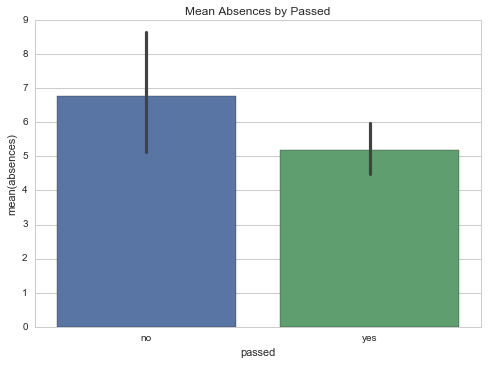

In [21]:
p= sns.barplot(x= combined_X_y.passed, y= combined_X_y.absences)
p.set_title('Mean Absences by Passed')
plt.show()

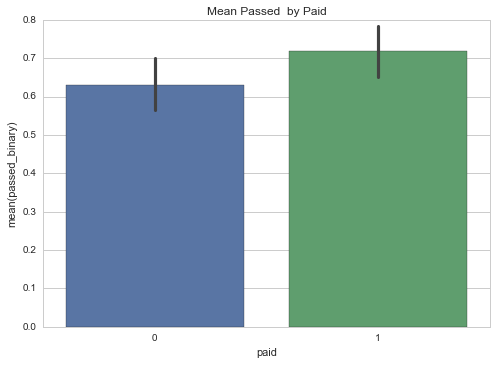

In [22]:
p= sns.barplot(x="paid", y= 'passed_binary',data= combined_X_y);
p.set_title("Mean Passed  by Paid")
plt.show()

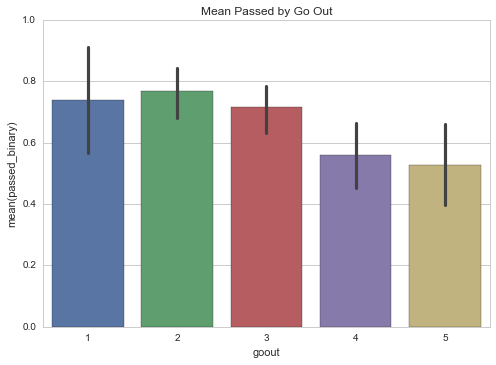

In [23]:
p= sns.barplot(x="goout", y="passed_binary", order= [1,2,3,4,5],data= combined_X_y);
p.set_title('Mean Passed by Go Out')
plt.show()

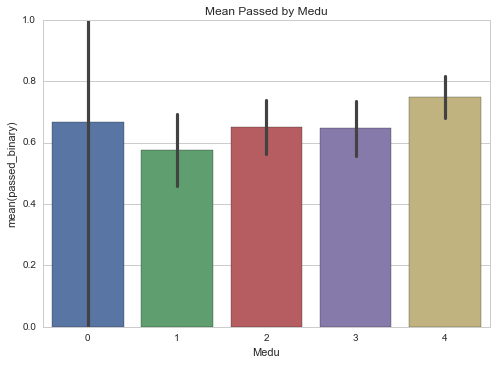

In [24]:
p= sns.barplot(x="Medu", y= 'passed_binary', order= [0,1,2,3,4], data= combined_X_y);
p.set_title('Mean Passed by Medu')
plt.show()

# 4. Training and Evaluating Models
Choose 3 supervised learning models that are available in scikit-learn, and appropriate for this problem. For each model:

- What is the theoretical O(n) time & space complexity in terms of input size?
- What are the general applications of this model? What are its strengths and weaknesses?
- Given what you know about the data so far, why did you choose this model to apply?
- Fit this model to the training data, try to predict labels (for both training and test sets), and measure the F<sub>1</sub> score. Repeat this process with different training set sizes (100, 200, 300), keeping test set constant.

Produce a table showing training time, prediction time, F<sub>1</sub> score on training set and F<sub>1</sub> score on test set, for each training set size.

Note: You need to produce 3 such tables - one for each model.

#### Chosen Models
- Adaboost
- Multnomial Bayes
- SVM

In [61]:
# load combined table of classifier training size results
classifier_metrics= pd.read_csv('combined_df.csv', index_col= False)

#### Adaboost

- What is the theoretical O(n) time & space complexity in terms of input size?
The theoretical O(n) can vary widely for Adaboost and is largely dependent on the followinng factors:
    + Base_estimator:  Typically this is a decison tree which has a theoretical O(log(n_samples)) for predicton and a general training time of O(n_samples * n_features * (log(n_samples)).
    + Number of features (see above)
    + Number of samples (see above)
    + Number of estimators (the more we have the larger the time and space complexity)

    The impact of number of samples, features, and estimators on time complexity is emprically demonstrated in the remainder of this report. Generally the time complexity is proportional to each factor. 
    

- What are the general applications of this model? What are its strengths and weaknesses?
    
    Adaboost is an ensemble method which can be used for classification and regression.  Ensemble methods combine the predictions of several base estimators to improve robustness and generalizability.  Adaboost is a boosting algorithm which combines several (default is 50) weak learners (result of each individueal learner is slightly better than random) to produce a strong learner. During training each estimator learns a portion of the data during several rounds of learning. As learning progresses the weak learners are boosted through performance based weighting. This way good performers are de-prioritized for training, and poor performers are prioritized. The end result is typically a well generalized and robust strong learner.
    
    
- Given what you know about the data so far, why did you choose this model to apply?

    This model was considred because it has the similar advantages to a decisoin tree, when a decision tree is used as the base estimator, but with the added advantage of combining multiple "weak" decision trees to decrease error rate, increase robustness, and decrease opportunities of overfitting. Adaboost also has tunable hyper parameters which can be used to augment the model.  The particular properties of decison trees which were drivers for the decision to use adaboost are:

    - Requires little data preparation.
    - Low prediction cost
    - Able to handle both numerical and categorical data.
    - Performs well even if some assumptions for the model are violated.

    In other words, it is robust.  Considering that the school district may not have a budget for maintenance of the classifier, a robust model is best.
    
    #### Adaboost Training Size Results

In [62]:
classifier_metrics[classifier_metrics.classifier == 'adaboost']

,classifier,train_size,training_time(s),f1_train,f1_test
0,adaboost,25,0.509,1.000000,0.672000
1,adaboost,50,0.492,1.000000,0.759690
2,adaboost,100,0.431,0.948148,0.766917
3,adaboost,200,0.407,0.892734,0.828125
4,adaboost,300,0.528,0.863741,0.781955


#### Multinomial Bayes

- What is the theoretical O(n) time & space complexity in terms of input size?

    Multinomial Bayes is an implementation of Naive Bayes for multinomially distributed data, and has similiar properties to the Naive Bayes classifier. Since Bayesian algorithms essentially build a mapping of counts pre and post evidence (features) the theoretical time complexity is O(n).
    
- What are the general applications of this model? What are its strengths and weaknesses?

    Bayesian algorithms are typically reserved for classification and are often used for applications that need to be fast, such as spam classification.  
    
    **Strengths include:**    
    
    - simple "white box" model
    - faster run time than more complex and sophisticated models
    - treats each feature distribution independently, mitigating the curse of dimensionality
    
  **Weaknesses include:**
    
     - Since the model is so simple we risk a high bias model and there are very few parameters to tune for performance improvment.
     - The "naive" assumpitons that make them great classifiers tend to make them unrelable estimators, so their predictiion probabiiites are not reliable.

- Given what you know about the data so far, why did you choose this model to apply?

Based on the client specifications and the number of features I felt it was worth trying a fast and reliable classifier that is robust to the curse of dimensionality. A white box model is also desierable in terms of explaining the mapping between inputs and outputs to the school district.

#### MNB Training Size Results

In [63]:
classifier_metrics[classifier_metrics.classifier == 'mnb']

,classifier,train_size,training_time(s),f1_train,f1_test
5,mnb,25,0.000,0.785714,0.741935
6,mnb,50,0.004,0.852941,0.766917
7,mnb,100,0.004,0.800000,0.753846
8,mnb,200,0.004,0.805654,0.794118
9,mnb,300,0.000,0.795402,0.794118


#### Support Vector Machine (SVM)

- What is the theoretical O(n) time & space complexity in terms of input size?

    According to [Support Vector Machine Solvers by Bottou and Lin](http://140.112.30.28/~cjlin/papers/bottou_lin.pdf) time complexity is dependent on the C parameter and is in the range O(n^2) - O(n^3).

- What are the general applications of this model? What are its strengths and weaknesses?

    Suppot vector machines are used in classification, regression, and outlier detection. Per the [Scikit-learn User's Guide](http://scikit-learn.org/stable/modules/svm.html):
    
    **The advantages of support vector machines are:**
    
    - Effective in high dimensional spaces.
    - Still effective in cases where number of dimensions is greater than the number of samples.
    - Uses a subset of training points in the decision function (called support vectors), so it is also memory efficient.
    - Versatile: different Kernel functions can be specified for the decision function. Common kernels are provided, but it is also possible to specify custom kernels.
    
  **The disadvantages of support vector machines include:**
    
    - If the number of features is much greater than the number of samples, the method is likely to give poor performances.
    - SVMs do not directly provide probability estimates, these are calculated using an expensive five-fold cross-validation.

- Given what you know about the data so far, why did you choose this model to apply?

    I wanted to apply a memory effieicent model that is effective in high dimensional space.
    
    #### SVM Training Size Results

In [64]:
classifier_metrics[classifier_metrics.classifier == 'svc']

,classifier,train_size,training_time(s),f1_train,f1_test
10,svc,25,0.000,1.000000,0.587156
11,svc,50,0.000,0.937500,0.698413
12,svc,100,0.000,0.855072,0.731343
13,svc,200,0.016,0.841060,0.788321
14,svc,300,0.041,0.855263,0.776119


### Functions and Imports

Functions and associated imports for this section.

In [25]:
import time


# Train a model
def train_classifier(clf, X_train, y_train):
    #print "Training {}... \n".format(clf.__class__.__name__)
    start = time.time()
    clf.fit(X_train, y_train)
    end = time.time()
    #print "Done!\nTraining time (secs): {:.3f}".format(end - start)
    return end - start

from sklearn.metrics import f1_score, precision_score, recall_score

def predict_labels(clf, features, target):
    #print "Predicting labels using {}... \n".format(clf.__class__.__name__)
    start = time.time()
    y_pred = clf.predict(features)
    end = time.time()
    #print "Done!\nPrediction time (secs): {:.3f} \n".format(end - start)
    return f1_score(target.values, y_pred, pos_label='yes')

# Train and predict using different training set sizes
def train_predict(clf, X_train, y_train, X_test, y_test):
    #print "------------------------------------------"
    #print "Training set size: {}".format(len(X_train))
    train_classifier(clf, X_train, y_train)
    #print "F1 score for training set: {}".format(predict_labels(clf, X_train, y_train))
    #print "F1 score for test set: {}".format(predict_labels(clf, X_test, y_test))
    f1_score_train = predict_labels(clf, X_train, y_train)
    f1_score_test = predict_labels(clf, X_test, y_test)
    training_time = train_classifier(clf, X_train, y_train)
    
    return training_time, f1_score_train, f1_score_test

def build_clf_metrics_table(metrics_dict, dependent_variable_name):
    clf_df = pd.DataFrame.from_dict(metrics_dict, orient='index')
    clf_df.columns = ["training_time(s)", "f1_train","f1_test"]
    clf_df = clf_df.sort_index()
    clf_df = clf_df.reset_index()
    clf_df.rename(columns={'index': dependent_variable_name},inplace=True)
    return clf_df


def build_melted_metrics_table(df):
    

    cols_train = [x for x in df.columns if x != 'f1_test']
    cols_test = [x for x in df.columns if x != 'f1_train']

    df_train = df[cols_train]
    df_train['kind'] = 'train'
    df_train.rename(columns= {'f1_train': 'f1'}, inplace= True)

    df_test = df[cols_test]
    df_test['kind'] = 'test'
    df_test.rename(columns= {'f1_test': 'f1'}, inplace= True)

    return df_train.append(df_test)

def gen_test_train_plot(data, dependent_variable_name):
    plot = sns.pointplot(x= dependent_variable_name, y= 'f1', hue= 'kind', data = data)
    return plot

# Train and predict using different training set sizes, now with less printy goodness
def train_predict_noprint(clf, X_train, y_train, X_test, y_test):
    #print "------------------------------------------"
    #print "Training set size: {}".format(len(X_train))
    train_classifier(clf, X_train, y_train)
    #print "F1 score for training set: {}".format(predict_labels(clf, X_train, y_train))
    #print "F1 score for test set: {}".format(predict_labels(clf, X_test, y_test))
    f1_score_train = predict_labels(clf, X_train, y_train)
    f1_score_test = predict_labels(clf, X_test, y_test)
    training_time = train_classifier(clf, X_train, y_train)
    
    return training_time, f1_score_train, f1_score_test

### Adaboost All Features

In [26]:
# TODO: Choose a model, import it and instantiate an object
from sklearn.ensemble import AdaBoostClassifier
clf = AdaBoostClassifier()

# Fit model to training data
train_classifier(clf, X_train, y_train)  # note: using entire training set here
print clf

# Predict on training set and compute F1 score
train_f1_score = predict_labels(clf, X_train, y_train)
print "F1 score for training set: {} \n".format(train_f1_score)

# Predict on test data
print "F1 score for test set: {} \n".format(predict_labels(clf, X_test, y_test))

AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None,
          learning_rate=1.0, n_estimators=50, random_state=None)
F1 score for training set: 0.863741339492 

F1 score for test set: 0.781954887218 



In [27]:
# TODO: Run the helper function above for desired subsets of training data
# Note: Keep the test set constant

sizes = [25, 50, 100, 200, len(X_train)]

metrics = {}
for size in sizes:
    training_time, f1_score_train, f1_score_test = train_predict(clf, X_train[:size],
                                                                 y_train[:size], X_test, y_test)
    
    metrics_list = [training_time, f1_score_train, f1_score_test]
    
    metrics[size] = metrics_list   
    

In [28]:
adaboost_metrics = build_clf_metrics_table(metrics, 'train_size')
adaboost_metrics

,train_size,training_time(s),f1_train,f1_test
0,25,0.509,1.000000,0.672000
1,50,0.492,1.000000,0.759690
2,100,0.431,0.948148,0.766917
3,200,0.407,0.892734,0.828125
4,300,0.528,0.863741,0.781955


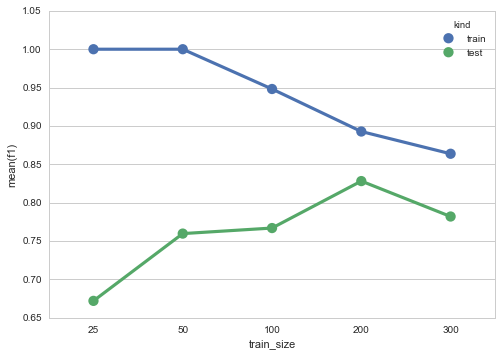

In [30]:
adaboost_melted = build_melted_metrics_table(adaboost_metrics)

adaboost_plot = gen_test_train_plot(adaboost_melted, 'train_size')

### Multnomial Bayes All Features

In [31]:
# TODO: Choose a model, import it and instantiate an object
from sklearn.naive_bayes import MultinomialNB
clf = MultinomialNB()

# Fit model to training data
train_classifier(clf, X_train, y_train)  # note: using entire training set here
print clf

# Predict on training set and compute F1 score
train_f1_score = predict_labels(clf, X_train, y_train)
print "F1 score for training set: {} \n".format(train_f1_score)

# Predict on test data
print "F1 score for test set: {} \n".format(predict_labels(clf, X_test, y_test))

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)
F1 score for training set: 0.795402298851 

F1 score for test set: 0.794117647059 



In [32]:
# TODO: Run the helper function above for desired subsets of training data
# Note: Keep the test set constant

sizes = [25, 50, 100, 200, len(X_train)]

metrics = {}
for size in sizes:
    training_time, f1_score_train, f1_score_test = train_predict(clf, X_train[:size],
                                                                 y_train[:size], X_test, y_test)
    
    metrics_list = [training_time, f1_score_train, f1_score_test]
    
    metrics[size] = metrics_list   

In [33]:
mnb_metrics = build_clf_metrics_table(metrics, 'train_size')
mnb_metrics

,train_size,training_time(s),f1_train,f1_test
0,25,0.000,0.785714,0.741935
1,50,0.004,0.852941,0.766917
2,100,0.004,0.800000,0.753846
3,200,0.004,0.805654,0.794118
4,300,0.000,0.795402,0.794118


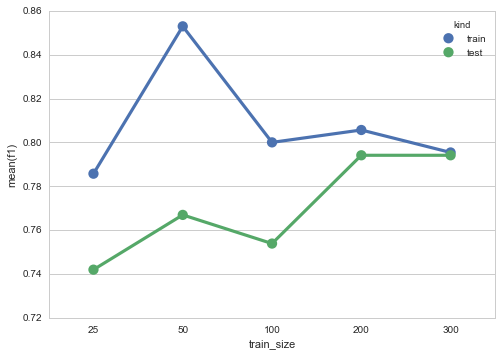

In [35]:
mnb_melted = build_melted_metrics_table(mnb_metrics)

mnb_plot = gen_test_train_plot(mnb_melted, 'train_size')

### Support Vector Machine All Features

#### Scale for SVM

In [36]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.fit_transform(X_test)

In [37]:
# TODO: Choose a model, import it and instantiate an object
from sklearn import svm
clf = svm.SVC(kernel='linear')

# Fit model to training data
train_classifier(clf, X_train_scaled, y_train)  # note: using entire training set here
print clf

# Predict on training set and compute F1 score
train_f1_score = predict_labels(clf, X_train_scaled, y_train)
print "F1 score for training set: {} \n".format(train_f1_score)

# Predict on test data
print "F1 score for test set: {} \n".format(predict_labels(clf, X_test_scaled, y_test))

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma='auto', kernel='linear',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)
F1 score for training set: 0.855263157895 

F1 score for test set: 0.776119402985 



In [38]:
# TODO: Run the helper function above for desired subsets of training data
# Note: Keep the test set constant

sizes = [25, 50, 100, 200, len(X_train)]

metrics = {}
for size in sizes:
    training_time, f1_score_train, f1_score_test = train_predict(clf, X_train_scaled[:size],
                                                                 y_train[:size], X_test_scaled, y_test)
    
    metrics_list = [training_time, f1_score_train, f1_score_test]
    
    metrics[size] = metrics_list   

In [39]:
svc_metrics = build_clf_metrics_table(metrics, 'train_size')
svc_metrics

,train_size,training_time(s),f1_train,f1_test
0,25,0.000,1.000000,0.587156
1,50,0.000,0.937500,0.698413
2,100,0.000,0.855072,0.731343
3,200,0.016,0.841060,0.788321
4,300,0.041,0.855263,0.776119


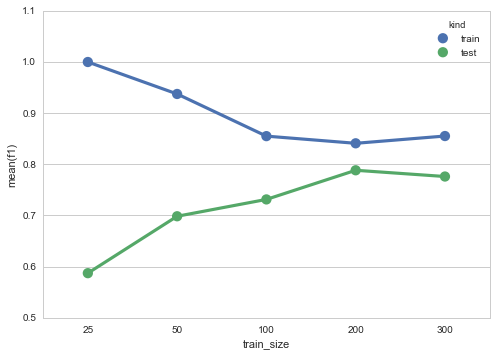

In [40]:
svc_melted = build_melted_metrics_table(svc_metrics)

svc_plot = gen_test_train_plot(svc_melted, 'train_size')

In [41]:
# add classifier column to each metrics DataFrame
dfs= [adaboost_metrics, mnb_metrics, svc_metrics]
classifiers= ['adaboost', 'mnb', 'svc']

for index,df in enumerate(dfs):
    df['classifier']= classifiers[index]    

In [60]:
# combine DataFrames    
combined_df= pd.concat([adaboost_metrics, mnb_metrics, svc_metrics])

# reorder columns
combined_cols= ['classifier', 'train_size', 'training_time(s)', 'f1_train', 'f1_test']
combined_df= combined_df[combined_cols]

#export to CSV
combined_df.to_csv('combined_df.csv', index= False)

### Classifiers with Reduced Feature Set

- Cut Feature set with SelectKBest and Chi^2 Scoring
- Test classifiers with reduced set

### Investigate Adaboost n-estimators

In [ ]:
# TODO: Run the helper function above for desired subsets of training data
# Note: Keep the test set constant

estimators = [1, 2, 5, 10, 20, 40, 50]

metrics = {}
for n_est in estimators:
    clf = AdaBoostClassifier(n_estimators= n_est)
    training_time, f1_score_train, f1_score_test = train_predict(clf, X_train,
                                                                 y_train, X_test, y_test)
    
    metrics_list = [training_time, f1_score_train, f1_score_test]
    
    metrics[n_est] = metrics_list   
    

In [ ]:
adaboost_metrics = build_clf_metrics_table(metrics, 'n_estimators')
adaboost_metrics

In [ ]:
adaboost_melted = build_melted_metrics_table(adaboost_metrics)

adaboost_plot = gen_test_train_plot(adaboost_melted, 'n_estimators')

### Adaboost

In [ ]:
# TODO: Choose a model, import it and instantiate an object
clf = AdaBoostClassifier(n_estimators= 5)

# Fit model to training data
train_classifier(clf, X_train, y_train)  # note: using entire training set here
print clf

# Predict on training set and compute F1 score
train_f1_score = predict_labels(clf, X_train, y_train)
print "F1 score for training set: {} \n".format(train_f1_score)

# Predict on test data
print "F1 score for test set: {} \n".format(predict_labels(clf, X_test, y_test))

# TODO: Run the helper function above for desired subsets of training data
# Note: Keep the test set constant

numfeatures = [1,2, 4, 10, 20, 48]

metrics = {}
for num in numfeatures:
    

    X_chi2 = SelectKBest(chi2, k= num)
    
    X_chi2_train = X_chi2.fit_transform(X_train, y_train)
    X_chi2_test = X_chi2.transform(X_test)
    
    print {'train':X_chi2_train.shape,
          'test':X_chi2_test.shape}
    
    
    

    
    training_time, f1_score_train, f1_score_test = train_predict_noprint(clf, X_chi2_train,
                                                                 y_train, X_chi2_test, y_test)
    
    metrics_list = [training_time, f1_score_train, f1_score_test]
    
    metrics[num] = metrics_list 
    

In [ ]:
adaboost_metrics = build_clf_metrics_table(metrics, 'num_features')
adaboost_metrics

In [ ]:
adaboost_melted = build_melted_metrics_table(adaboost_metrics)

adaboost_plot = gen_test_train_plot(adaboost_melted, 'num_features')

### Multnomial Bayes

In [ ]:
# TODO: Choose a model, import it and instantiate an object
clf = MultinomialNB()

# Fit model to training data
train_classifier(clf, X_train, y_train)  # note: using entire training set here
print clf

# Predict on training set and compute F1 score
train_f1_score = predict_labels(clf, X_train, y_train)
print "F1 score for training set: {} \n".format(train_f1_score)

# Predict on test data
print "F1 score for test set: {} \n".format(predict_labels(clf, X_test, y_test))

# TODO: Run the helper function above for desired subsets of training data
# Note: Keep the test set constant

numfeatures = [1,2, 4, 10, 20, 48]

metrics = {}
for num in numfeatures:
    

    X_chi2 = SelectKBest(chi2, k= num)
    
    X_chi2_train = X_chi2.fit_transform(X_train, y_train)
    X_chi2_test = X_chi2.transform(X_test)
    
    print {'train':X_chi2_train.shape,
          'test':X_chi2_test.shape}
    
    
    

    
    training_time, f1_score_train, f1_score_test = train_predict_noprint(clf, X_chi2_train,
                                                                 y_train, X_chi2_test, y_test)
    
    metrics_list = [training_time, f1_score_train, f1_score_test]
    
    metrics[num] = metrics_list 
    

In [ ]:
mbn_metrics = build_clf_metrics_table(metrics, 'num_features')
mbn_metrics

In [ ]:
mbn_melted = build_melted_metrics_table(mbn_metrics)

mbn_plot = gen_test_train_plot(mbn_melted, 'num_features')

### SVC

In [ ]:
# TODO: Choose a model, import it and instantiate an object
clf = svm.SVC(kernel= "linear")

# Fit model to training data
train_classifier(clf, X_train_scaled, y_train)  # note: using entire training set here
print clf

# Predict on training set and compute F1 score
train_f1_score = predict_labels(clf, X_train_scaled, y_train)
print "F1 score for training set: {} \n".format(train_f1_score)

# Predict on test data
print "F1 score for test set: {} \n".format(predict_labels(clf, X_test_scaled, y_test))

# TODO: Run the helper function above for desired subsets of training data
# Note: Keep the test set constant

numfeatures = [1,2, 4, 10, 20, 48]

metrics = {}
for num in numfeatures:
    

    X_chi2 = SelectKBest(chi2, k= num)
    
    X_chi2_train = X_chi2.fit_transform(X_train_scaled, y_train)
    X_chi2_test = X_chi2.transform(X_test_scaled)
    
    print {'train':X_chi2_train.shape,
          'test':X_chi2_test.shape}
    
    
    

    
    training_time, f1_score_train, f1_score_test = train_predict_noprint(clf, X_chi2_train,
                                                                 y_train, X_chi2_test, y_test)
    
    metrics_list = [training_time, f1_score_train, f1_score_test]
    
    metrics[num] = metrics_list 

In [ ]:
svc_metrics = build_clf_metrics_table(metrics, 'num_features')
svc_metrics

In [ ]:
svc_melted = build_melted_metrics_table(svc_metrics)

svc_plot = gen_test_train_plot(svc_melted, 'num_features')

## 5. Choosing the Best Model

- Based on the experiments you performed earlier, in 1-2 paragraphs explain to the board of supervisors what single model you chose as the best model. Which model is generally the most appropriate based on the available data, limited resources, cost, and performance?
- In 1-2 paragraphs explain to the board of supervisors in layman's terms how the final model chosen is supposed to work (for example if you chose a Decision Tree or Support Vector Machine, how does it make a prediction).
- Fine-tune the model. Use Gridsearch with at least one important parameter tuned and with at least 3 settings. Use the entire training set for this.
- What is the model's final F<sub>1</sub> score?

In [ ]:
# TODO: Fine-tune your model and report the best F1 score

In [ ]:
from sklearn.cross_validation import StratifiedShuffleSplit
from sklearn.tree import DecisionTreeClassifier
from sklearn import grid_search

In [ ]:
X_chi2 = SelectKBest(chi2, k= 10)
X_chi2_train = X_chi2.fit_transform(X_train, y_train)
X_chi2_test = X_chi2.transform(X_test)

In [ ]:
# initialize base estimator and classifier with base estimator (required for tuning of base estimator parameters)
dtc = DecisionTreeClassifier()
clf = AdaBoostClassifier(base_estimator= dtc)

# initiate cross validator
cv = StratifiedShuffleSplit(y_train, 100, random_state = 42)

In [ ]:
# set up paramaters dictionary

a_params = dict(base_estimator__criterion= ['gini', 'entropy'],
                base_estimator__splitter=  ['best', 'random'],
                base_estimator__min_samples_leaf= [1,2,5],
                base_estimator__max_features= [3, 5, 10],
                n_estimators=[3, 5,10, 20],
                learning_rate=[.1,.5,1])

a_params

In [ ]:
from sklearn.metrics import make_scorer

f1_scorer = make_scorer(f1_score, pos_label="yes")

In [ ]:
# set up grid search and execute fit
adaboost_grid_search = grid_search.GridSearchCV(clf, param_grid = a_params, cv= cv, scoring= f1_scorer)

In [ ]:
score

In [ ]:
import pickle

In [ ]:
def dump_pkl(my_object, filename):
    with open(filename, "w") as outfile:
        pickle.dump(my_object, outfile)


def load_pkl(filename):
    with open(filename, "r") as infile:
        obj = pickle.load(infile)
        return obj

In [ ]:
grid_scores= load_pkl('grid_scores')
best_aclf= load_pkl('tuned_classifier')

In [ ]:
best_aclf

In [ ]:
pred = best_aclf.predict(X_chi2_test)

In [ ]:
score

In [ ]:
f1_score(y_test, pred, pos_label= 'yes')

In [ ]:
precision_score(y_test,pred, pos_label= 'yes')

In [ ]:
recall_score(y_test,pred, pos_label= 'yes')

In [ ]:
from sklearn.cross_validation import cross_val_score

In [ ]:
cv_test= StratifiedShuffleSplit(y_test, n_iter=100, random_state=42)

cross_val_F1= cross_val_score(best_aclf, X_chi2_test, y_test, cv=cv_test, scoring= f1_scorer)

In [ ]:
np.mean(cross_val_F1)

In [ ]:
sns.distplot(cross_val_F1, rug=True);

In [ ]:
np.set_printoptions(suppress=True)

In [ ]:
log_probs = best_aclf.predict_log_proba(X_chi2_test)
log_probs_df= pd.DataFrame(log_probs, columns= ['Yes', 'No'])

In [ ]:
log_probs_df.head(5)

In [ ]:
probs = np.round(best_aclf.predict_proba(X_chi2_test) * 100, decimals=2)
probs_df= pd.DataFrame(probs, columns= ['Yes', 'No'])

In [ ]:
sns.distplot(log_probs_df.No)

In [ ]:
sns.distplot(probs_df.No)

In [ ]:
cols_interest = ['failures', 'absences', 'paid']

X_all_matters = X_all[cols_interest]
X_test_all_matters = X_test[cols_interest]

In [ ]:
X_test[cols_interest].head()

In [ ]:
X_chi2_test[0]

In [ ]:
 np.round(best_aclf.predict_proba(X_chi2_test[1]) * 100, decimals=2)

In [ ]:
failures= X_chi2_test[:,6]
paid= X_chi2_test[:,7]
absences= X_chi2_test[:,9]

In [ ]:
cols_add= [failures, paid, absences]
cols_add_names= ['failures', 'paid', 'absences']

In [ ]:
for name in cols_add_names:
    for data in cols_add:
        

In [ ]:
probs_df.head()

In [ ]:
trial= X_test[cols_interest].head(15)

In [ ]:
trial['result'] = y_test

In [ ]:
trial['prob'] = probs_df.Yes

In [ ]:
trial

### References

1. Scikit-learn documentation
2. [ Support Vector Machine Solvers by Bottou and Lin](http://140.112.30.28/~cjlin/papers/bottou_lin.pdf)
3. [Stats Stack Exchange](http://stats.stackexchange.com/questions/96995/machine-learning-classifiers-big-o-or-complexity)